In [2]:
import pandas as pd
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import cm
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Activation, Masking, BatchNormalization

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
#df=pd.read_csv('https://raw.githubusercontent.com/brendonhall/facies_classification/master/facies_vectors.csv')
#df.to_csv('facies_vectors.csv')
df=pd.read_csv('facies_vectors.csv')
df=df.dropna(axis=0)
print(df.head(3))
print(df.columns)
print("\nCreate a reservoir model of the largest gas fields in North America, the Hugoton and Panoma Fields")
print("\nFacies: The character of a rock expressed by its formation, composition, and fossil content.")

   Unnamed: 0  Facies Formation  Well Name   Depth     GR  ILD_log10  \
0           0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664   
1           1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661   
2           2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658   

   DeltaPHI   PHIND   PE  NM_M  RELPOS  
0       9.9  11.915  4.6     1   1.000  
1      14.2  12.565  4.1     1   0.979  
2      14.8  13.050  3.6     1   0.957  
Index(['Unnamed: 0', 'Facies', 'Formation', 'Well Name', 'Depth', 'GR',
       'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

Create a reservoir model of the largest gas fields in North America, the Hugoton and Panoma Fields

Facies: The character of a rock expressed by its formation, composition, and fossil content.


In [4]:
#df['Well Name'] = df['Well Name'].astype('category')
if "Formation" in df.columns:
    result = pd.get_dummies(df['Formation'].astype('category'))
    df=pd.concat([df,result],axis=1)
    #print(df['Well Name'].unique())
    df.drop(['Formation'],axis=1,inplace=True)

if "Well Name" in df.columns:    
    result = pd.get_dummies(df['Well Name'].astype('category'))
    df=pd.concat([df,result],axis=1)
    df.drop(['Well Name'],axis=1,inplace=True)

In [5]:
columns=[column for column in df.columns if column != "Facies"]
print(columns)
X=df[columns]
y=df["Facies"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

['Unnamed: 0', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'A1 LM', 'A1 SH', 'B1 LM', 'B1 SH', 'B2 LM', 'B2 SH', 'B3 LM', 'B3 SH', 'B4 LM', 'B4 SH', 'B5 LM', 'B5 SH', 'C LM', 'C SH', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NEWBY', 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']


In [6]:
def PlotBar(field):
    #plt.scatter(x=x,y=X_train["ILD_log10"])
    for facies in df["Facies"].unique():
        plt.figure(figsize=(20,2))
        filter=df["Facies"]==facies
        df[filter][field].plot(kind="bar")
        plt.title(dictFacies[facies])
        plt.xticks(rotation=90)
        plt.xticks([])
        plt.show()


Resistivity Logs measure how electricity travels through rocks and sediments. This determines what types of fluids are present because oil and fresh water are poor conductors of electricity, while formation waters are salty and easily conduct electricity.


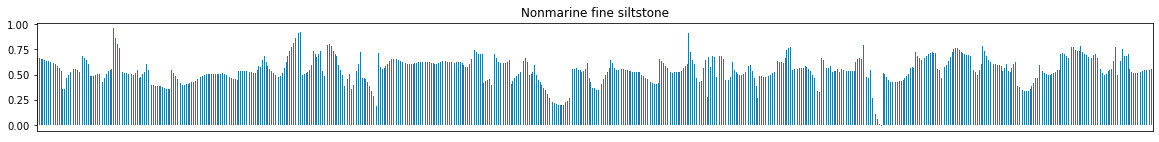

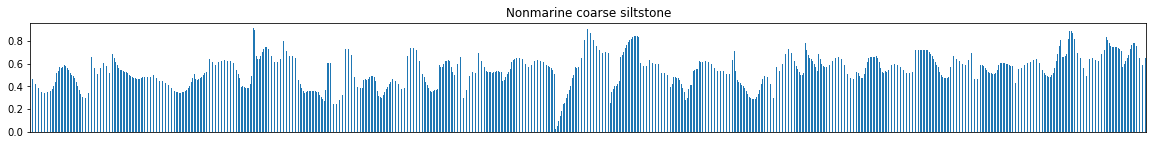

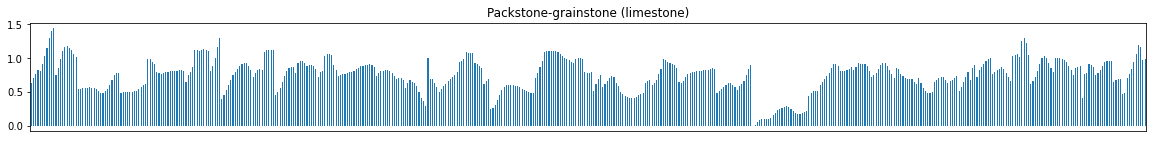

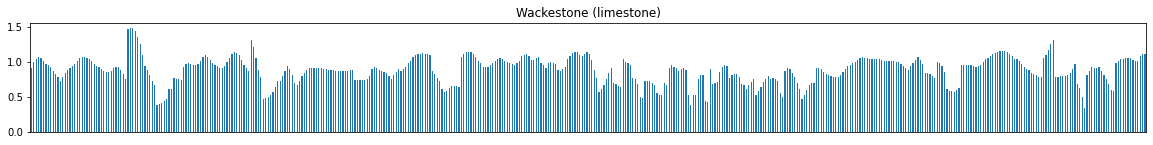

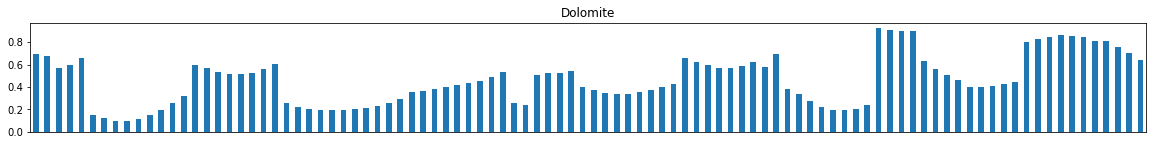

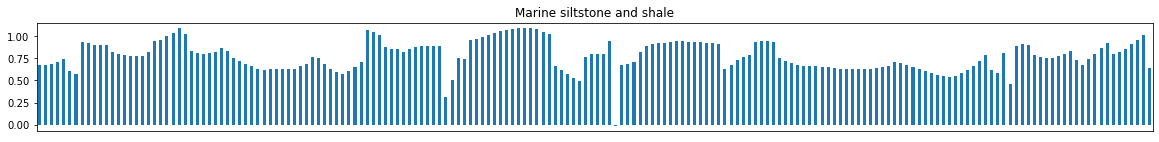

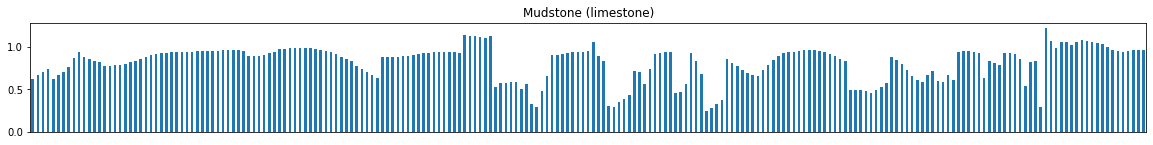

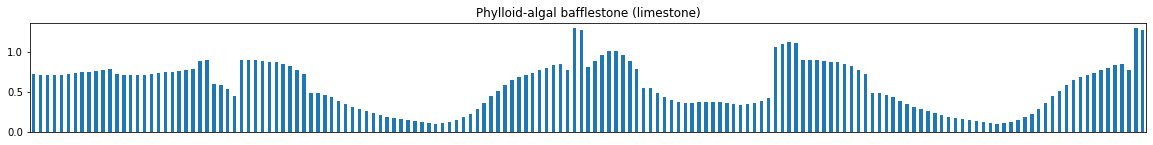

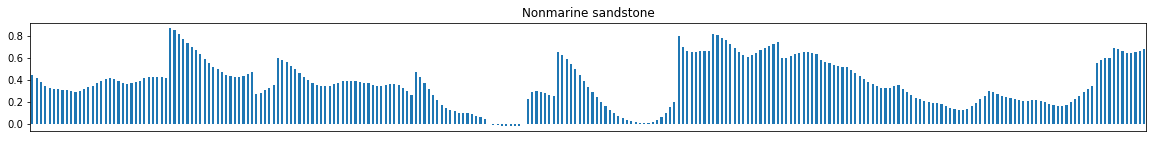

In [218]:
print("Resistivity Logs measure how electricity travels through rocks and sediments. This determines what types of fluids are present because oil and fresh water are poor conductors of electricity, while formation waters are salty and easily conduct electricity.")
x=np.linspace(1,len(X_train),len(X_train))
#print(x)
PlotBar("ILD_log10")


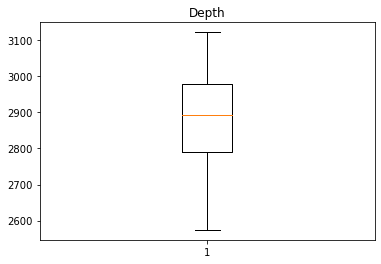

In [219]:
plt.boxplot(X_train["Depth"])
plt.title("Depth")
plt.show()
#PlotBar("Depth")

In [220]:
print("\ngamma ray (GR)")
print("\nResistivity logging (ILD_log10)")
print("\nPhotoelectric effect (PE)")
print("\nNeutron-density porosity difference DeltaPHI")
print("\nAverage neutron-density porosity PHIND")


gamma ray (GR)

Resistivity logging (ILD_log10)

Photoelectric effect (PE)

Neutron-density porosity difference DeltaPHI

Average neutron-density porosity PHIND


Gamma ray logs are used primarily to distinguish clean, potentially productive intervals from probable unproductive shale intervals. The measurement is used to locate shale beds and quantify shale volume. Clay minerals are formed from the decomposition of igneous rock.


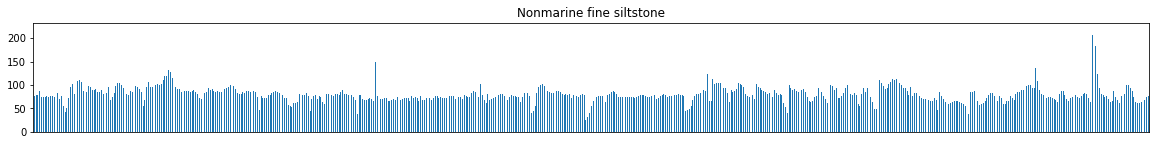

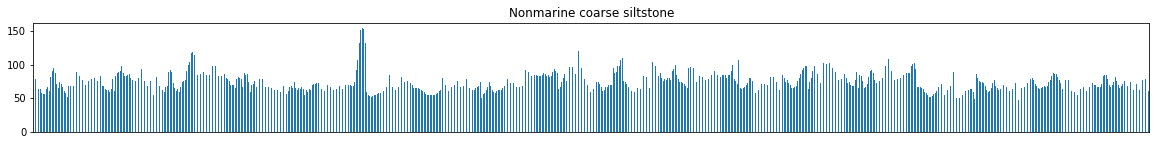

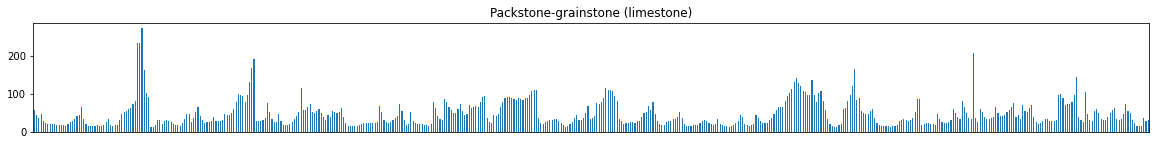

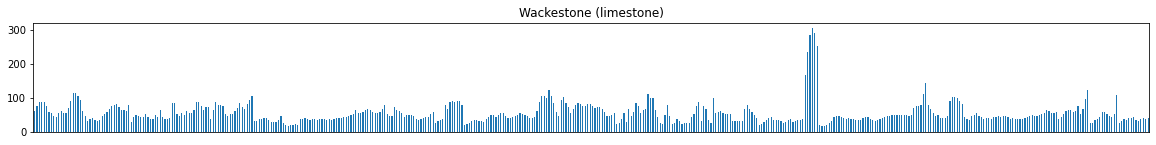

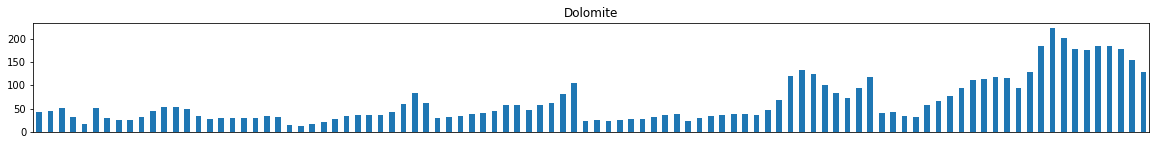

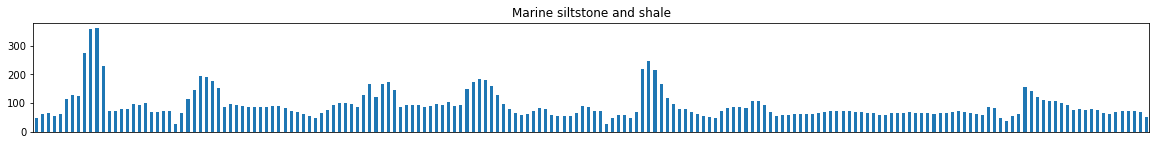

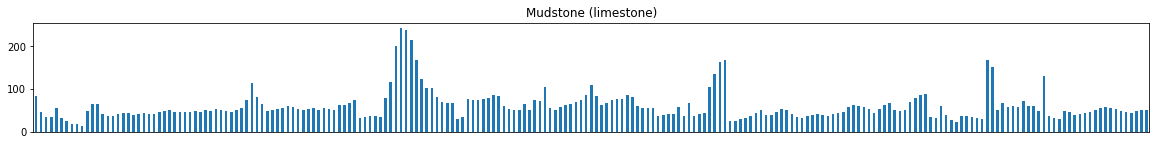

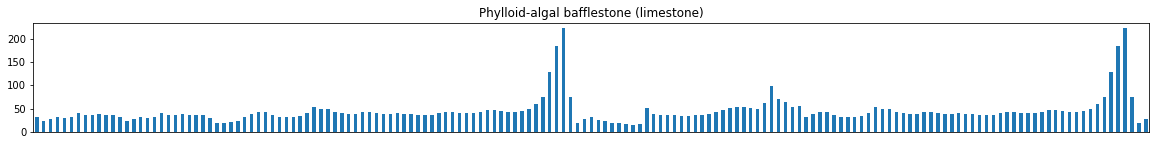

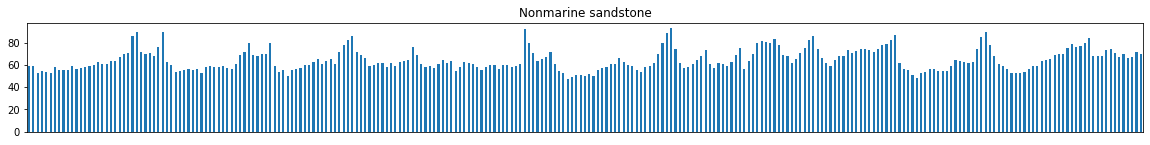

In [221]:
#plt.scatter(x=x,y=X_train["GR"])
print("Gamma ray logs are used primarily to distinguish clean, potentially productive intervals from probable unproductive shale intervals. The measurement is used to locate shale beds and quantify shale volume. Clay minerals are formed from the decomposition of igneous rock.")
PlotBar("GR")

A gamma ray interaction in which the gamma ray is fully absorbed by a bound electron. If the energy transferred exceeds the binding energy to the atom, the electron will be ejected. Normally, the ejected electron will be replaced within the material and a characteristic X-ray will be emitted with an energy that is dependent on the atomic number of the material.

 In general the trend toward higher radioactivity increase with shale content. At the high radioactivity extreme are organic-rich shales and potash (KCl). 


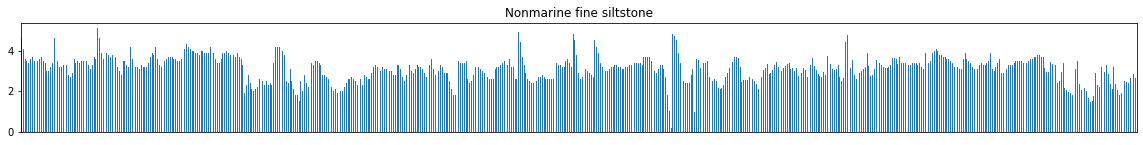

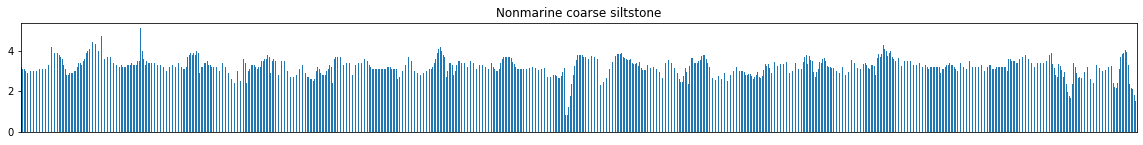

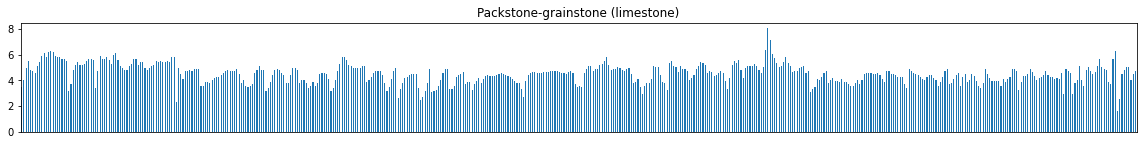

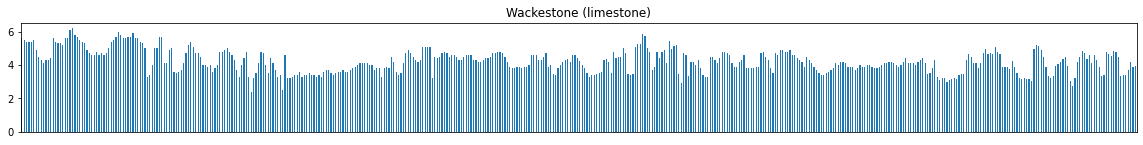

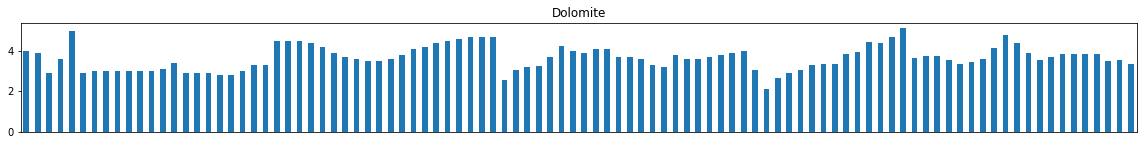

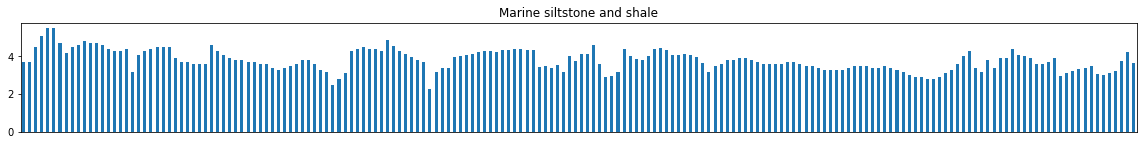

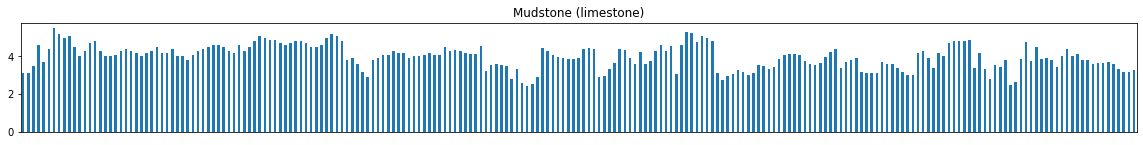

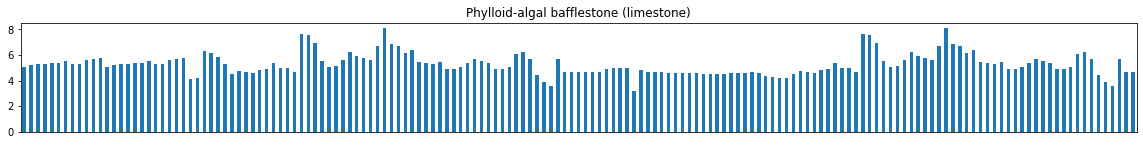

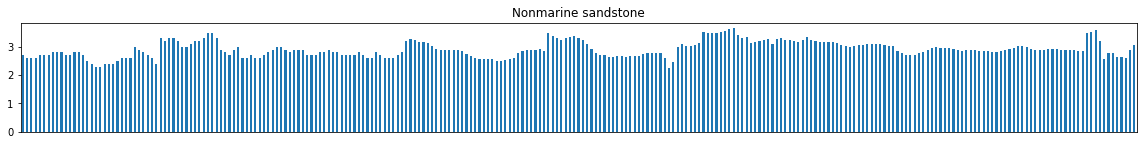

In [222]:
#plt.scatter(x=x,y=X_train["PE"])
print("A gamma ray interaction in which the gamma ray is fully absorbed by a bound electron. If the energy transferred exceeds the binding energy to the atom, the electron will be ejected. Normally, the ejected electron will be replaced within the material and a characteristic X-ray will be emitted with an energy that is dependent on the atomic number of the material.")
print("\n In general the trend toward higher radioactivity increase with shale content. At the high radioactivity extreme are organic-rich shales and potash (KCl). ")
PlotBar("PE")

In [223]:
#https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0
#https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

In [224]:
#plt.figure(figsize=(10, 8))
# Plotting our two-features-space
#sns.scatterplot(x=X_train.iloc[:, 0], 
#                y=X_train.iloc[:, 1], 
#                hue=y_train, 
#                s=8);

In [225]:
#X = np.array(df[columns].values)
#y = np.array(df["Facies"].values)#plt.scatter(X[:, 2], y,c=y)
#plt.ylabel('Facies')
#plt.title('Shapes')
#plt.legend()
#print(columns[1])

In [53]:
X = df[columns].values
y = pd.get_dummies(df["Facies"],prefix="Facies")

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [54]:
#print(np.shape(y_train.values.reshape(-1)))
print(y_train.columns)
print(y_train)


Index(['Facies_1', 'Facies_2', 'Facies_3', 'Facies_4', 'Facies_5', 'Facies_6',
       'Facies_7', 'Facies_8', 'Facies_9'],
      dtype='object')
      Facies_1  Facies_2  Facies_3  Facies_4  Facies_5  Facies_6  Facies_7  \
3769         0         0         0         0         0         0         0   
1672         0         0         1         0         0         0         0   
3084         0         0         0         0         0         0         0   
3559         0         1         0         0         0         0         0   
1233         0         0         1         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
1561         0         0         0         0         0         1         0   
1596         0         0         0         0         0         0         0   
1760         0         1         0         0         0         0         0   
1326         0         0         0         0         1         0         0 

In [65]:
#svm = SVC(kernel="linear")
svm = SVC(kernel='poly', degree=3, C=1).fit(X_train,y_train["Facies_2"].values)

dictFacies={1:'Nonmarine sandstone',
2:'Nonmarine coarse siltstone',
3:'Nonmarine fine siltstone',
4:'Marine siltstone and shale',
5:'Mudstone (limestone)',
6:'Wackestone (limestone)',
7:'Dolomite',
8:'Packstone-grainstone (limestone)',
9:'Phylloid-algal bafflestone (limestone)'}

#https://github.com/brendonhall/facies_classification/blob/master/Facies%20Classification%20-%20SVM.ipynb

#print(y_train)
svm.fit(X_train,y_train["Facies_1"].values)

SVC(C=1, kernel='poly')

In [58]:


model=Sequential()

model.add(Dense(540, input_shape=(len(columns),),activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(480, activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(440, activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(62, activation='LeakyReLU'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='LeakyReLU'))
model.add(Dense(len(y.columns)))

model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])


print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 540)               17280     
                                                                 
 batch_normalization_3 (Batc  (None, 540)              2160      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 540)               0         
                                                                 
 dense_6 (Dense)             (None, 480)               259680    
                                                                 
 batch_normalization_4 (Batc  (None, 480)              1920      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 480)              

Epoch 1/100
71/71 [==============================] - 2s 11ms/step - loss: 2.7621 - accuracy: 0.0937
Epoch 2/100
71/71 [==============================] - 1s 11ms/step - loss: 2.6922 - accuracy: 0.1096
Epoch 3/100
71/71 [==============================] - 1s 12ms/step - loss: 2.6425 - accuracy: 0.1149
Epoch 4/100
71/71 [==============================] - 1s 11ms/step - loss: 2.5703 - accuracy: 0.1317
Epoch 5/100
71/71 [==============================] - 1s 12ms/step - loss: 2.5183 - accuracy: 0.1340
Epoch 6/100
71/71 [==============================] - 1s 11ms/step - loss: 2.4938 - accuracy: 0.1317
Epoch 7/100
71/71 [==============================] - 1s 11ms/step - loss: 2.4212 - accuracy: 0.1463
Epoch 8/100
71/71 [==============================] - 1s 15ms/step - loss: 2.4068 - accuracy: 0.1459
Epoch 9/100
71/71 [==============================] - 1s 14ms/step - loss: 2.3334 - accuracy: 0.1667
Epoch 10/100
71/71 [==============================] - 1s 14ms/step - loss: 2.2916 - accuracy: 0.1808

71/71 [==============================] - 1s 10ms/step - loss: 1.2564 - accuracy: 0.5615
Epoch 83/100
71/71 [==============================] - 1s 10ms/step - loss: 1.2604 - accuracy: 0.5597
Epoch 84/100
71/71 [==============================] - 1s 10ms/step - loss: 1.2500 - accuracy: 0.5685
Epoch 85/100
71/71 [==============================] - 1s 10ms/step - loss: 1.2294 - accuracy: 0.5809
Epoch 86/100
71/71 [==============================] - 1s 10ms/step - loss: 1.2344 - accuracy: 0.5805
Epoch 87/100
71/71 [==============================] - 1s 12ms/step - loss: 1.2246 - accuracy: 0.5729
Epoch 88/100
71/71 [==============================] - 1s 11ms/step - loss: 1.2396 - accuracy: 0.5685
Epoch 89/100
71/71 [==============================] - 1s 11ms/step - loss: 1.2144 - accuracy: 0.5813
Epoch 90/100
71/71 [==============================] - 1s 11ms/step - loss: 1.2225 - accuracy: 0.5866
Epoch 91/100
71/71 [==============================] - 1s 11ms/step - loss: 1.2338 - accuracy: 0.5694
Epo

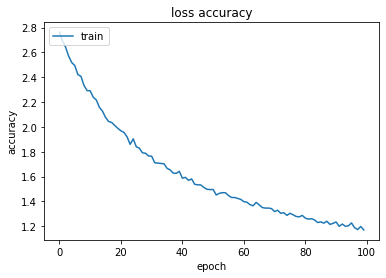

In [59]:
history=model.fit(X_train, y_train,epochs = 100,verbose=1)

model.evaluate(X_test, y_test)

plt.plot(history.history['loss'])
plt.title('loss accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
y_svm_pred_text=svm.predict(X_test[0:50])
#cm = confusion_matrix(y_train[0:100], y_svm_pred_text)

50 50
50 50


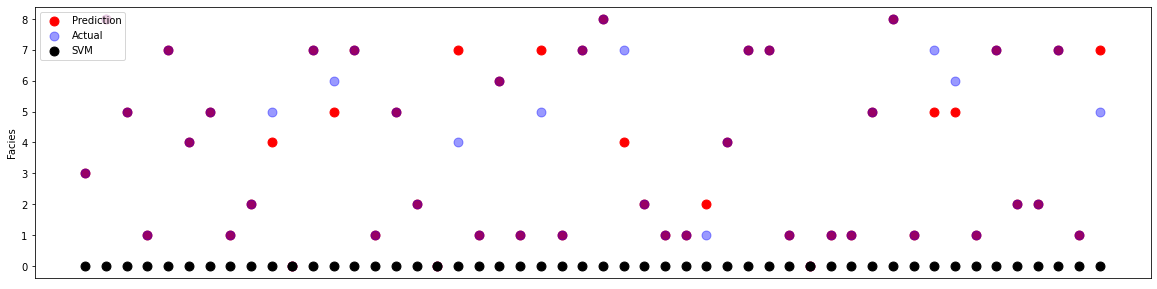

Matches occur when the red doc and blue dot overlap per interval of x.


In [61]:
y_pred_test = model.predict(X_test[0:50], verbose=0)


#print(y_train)
#print(y_pred_test)
y_pred_result=np.argmax(y_pred_test,axis=1)
#for index,item in enumerate(y_pred_test):
#    y_pred_result.append(np.argmax(item))
#print(y_result)

y_actual_result=[]
#print(y_train)
for index, item in y_test[0:50].iterrows():
    y_actual_result.append(np.argmax(item))
    

y_pred_svm_result=[]
for index,item in enumerate(y_svm_pred_text):
    y_pred_svm_result.append(np.argmax(item))

plt.figure(figsize=(20,5))

x=np.linspace(0,len(y_pred_result),len(y_pred_result))
print(len(x),len(y_pred_result))
print(len(x),len(y_actual_result))
plt.scatter(x=x,y=y_pred_result, color='red', label='Prediction',s=80)
plt.scatter(x=x,y=y_actual_result, color='blue', label='Actual',s=80, alpha=.4)
plt.scatter(x=x,y=y_pred_svm_result, color='black', label='SVM',s=80)

#plt.scatter(x=X_train[0:6000],y=y_pred_test, color='red', label='Prediction')
#plt.scatter(x=X_train[0:6000], y=y_train[0:6000], color='blue', label='Ground Truth')
plt.ylabel("Facies")
plt.xticks([])
plt.legend(loc='upper left')
plt.show()

print("Matches occur when the red doc and blue dot overlap per interval of x.")

In [66]:
poly_accuracy = accuracy_score(y_actual_result, y_pred_svm_result)
poly_f1 = f1_score(y_actual_result, y_pred_svm_result, average='weighted')
print('Accuracy (Linearl Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Linearl Kernel):  6.00
F1 (Linear Kernel):  0.68
